In [1]:
library(tidyverse) 
library(fpp3)
library(rio) 
k = 1.5
options(repr.plot.width=6*k, repr.plot.height=5*k)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ lubridate   1.9.0     ✔ feasts      0.3.0
✔ tsibble     1.1.3     ✔ fable       0.3.2
✔ tsibbledata 0.4.1     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ purrr::flatten()     masks jsonlite::flatten()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble

In [2]:
m <- import('marriages.csv')
m2 <- mutate(m, date = yearmonth(date))
marriages <- as_tsibble(m2, index = date,
                       key = c('code', 'name'))
rf <- filter(marriages, code == 643)

In [3]:
rf

code,name,total,date
<int64>,<chr>,<int>,<mth>
643,Российская Федерация,55509,2006 Jan
643,Российская Федерация,62449,2006 Feb
643,Российская Федерация,70798,2006 Mar
643,Российская Федерация,86055,2006 Apr
643,Российская Федерация,35960,2006 May
643,Российская Федерация,111409,2006 Jun
643,Российская Федерация,127475,2006 Jul
643,Российская Федерация,149120,2006 Aug
643,Российская Федерация,151116,2006 Sep


In [4]:
rf_train <- filter(rf, date < ymd('2019-10-01'))
tail(rf_train)

Warning message in mask$eval_all_filter(dots, env_filter):
“Incompatible methods ("<.vctrs_vctr", "<.Date") for "<"”


code,name,total,date
<int64>,<chr>,<int>,<mth>
643,Российская Федерация,56818,2019 Apr
643,Российская Федерация,43531,2019 May
643,Российская Федерация,104709,2019 Jun
643,Российская Федерация,112845,2019 Jul
643,Российская Федерация,133217,2019 Aug
643,Российская Федерация,107033,2019 Sep


In [7]:
dim(rf)[1]-dim(rf_train)[1]

[1] 24

Plot variable not specified, automatically selected `.vars = total`


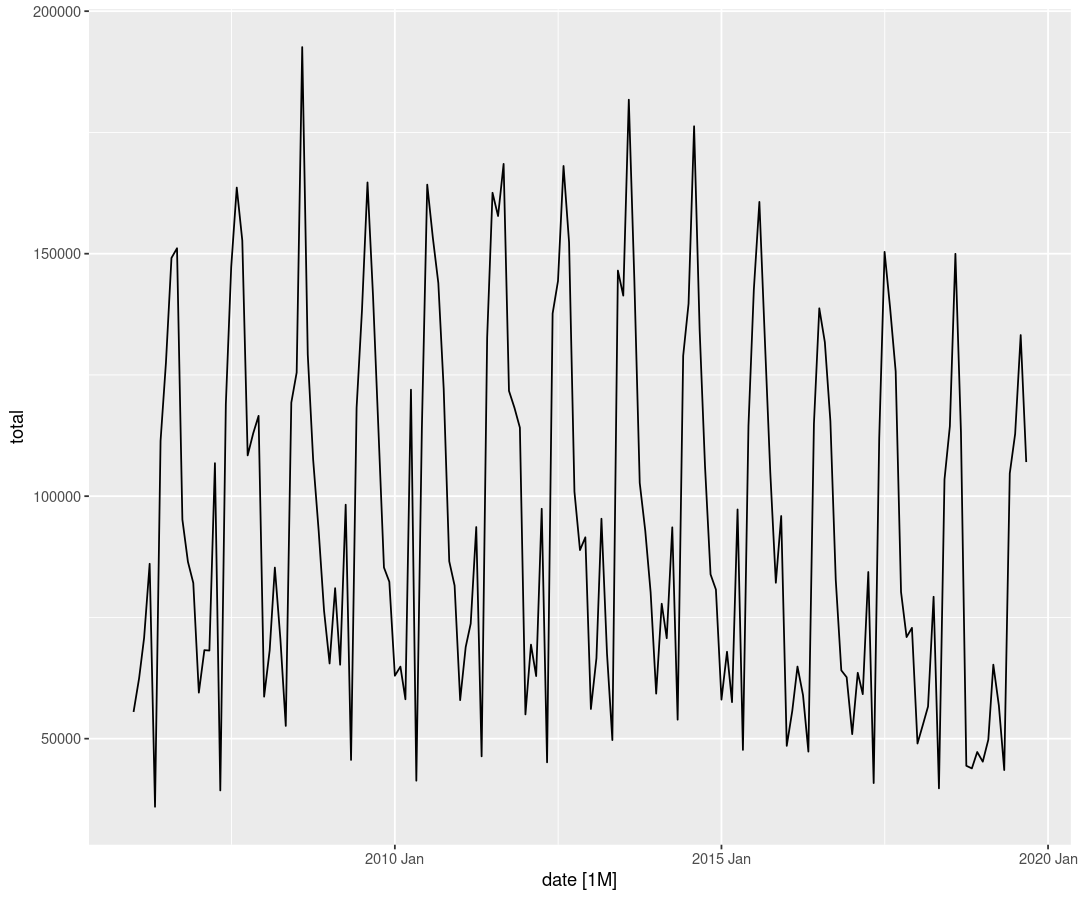

In [8]:
autoplot(rf_train)

In [9]:
mods <- model(rf_train,
      snaive = SNAIVE(total),
      ana = ETS(total ~ error('A') + trend('N') + season('A')),
      aadm = ETS(total ~ error('A') + trend('Ad') + season('A')),
      zzz = ETS(total),
      azz = ETS(total ~ error('A')),
      theta = THETA(total)
)
mods

code,name,snaive,ana,aadm,zzz,azz,theta
<int64>,<chr>,<model>,<model>,<model>,<model>,<model>,<model>
643,Российская Федерация,<SNAIVE>,"<ETS(A,N,A)>","<ETS(A,Ad,A)>","<ETS(M,N,M)>","<ETS(A,N,A)>",<THETA>


In [12]:
report(mods$zzz[[1]])

Series: total 
Model: ETS(M,N,M) 
  Smoothing parameters:
    alpha = 0.117708 
    gamma = 0.0001002307 

  Initial states:
    l[0]      s[0]     s[-1]    s[-2]    s[-3]   s[-4]    s[-5]    s[-6]
 98860.5 0.8778057 0.9038713 1.029667 1.440791 1.63612 1.460428 1.248881
     s[-7]     s[-8]     s[-9]    s[-10]   s[-11]
 0.4754327 0.9410506 0.7282367 0.6792146 0.578501

  sigma^2:  0.017

     AIC     AICc      BIC 
3948.919 3952.141 3995.509 


In [13]:
report(mods$azz[[1]])

Series: total 
Model: ETS(A,N,A) 
  Smoothing parameters:
    alpha = 0.1433434 
    gamma = 0.0001000151 

  Initial states:
     l[0]      s[0]     s[-1]    s[-2]    s[-3]    s[-4]    s[-5]    s[-6]
 99010.18 -12478.87 -10503.36 3315.196 42623.89 64437.72 44998.45 25034.34
     s[-7]     s[-8]     s[-9]    s[-10]    s[-11]
 -51192.07 -8192.165 -27695.75 -30037.88 -40309.51

  sigma^2:  146503343

     AIC     AICc      BIC 
3960.273 3963.495 4006.863 


In [14]:
fcst <- forecast(mods, h = 24)

In [16]:
accuracy(fcst, rf)

.model,code,name,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<int64>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aadm,643,Российская Федерация,Test,257.1641,15805.32,13597.93,0.280752,22.86505,1.1631783,1.0156439,0.4221963
ana,643,Российская Федерация,Test,-2240.8902,16040.93,13629.37,-3.844433,23.14151,1.1658674,1.0307840,0.4226046
azz,643,Российская Федерация,Test,-2240.8902,16040.93,13629.37,-3.844433,23.14151,1.1658674,1.0307840,0.4226046
snaive,643,Российская Федерация,Test,475.8750,19301.98,15235.46,-6.866376,28.11416,1.3032534,1.2403383,0.5308637
theta,643,Российская Федерация,Test,-3512.0637,13244.30,10634.21,-11.752502,21.73535,0.9096589,0.8510740,0.4612830
zzz,643,Российская Федерация,Test,-5210.2944,13911.98,10881.54,-14.550842,22.57595,0.9308156,0.8939789,0.4210189


Warning message in mask$eval_all_filter(dots, env_filter):
“Incompatible methods (">.vctrs_vctr", ">.Date") for ">"”


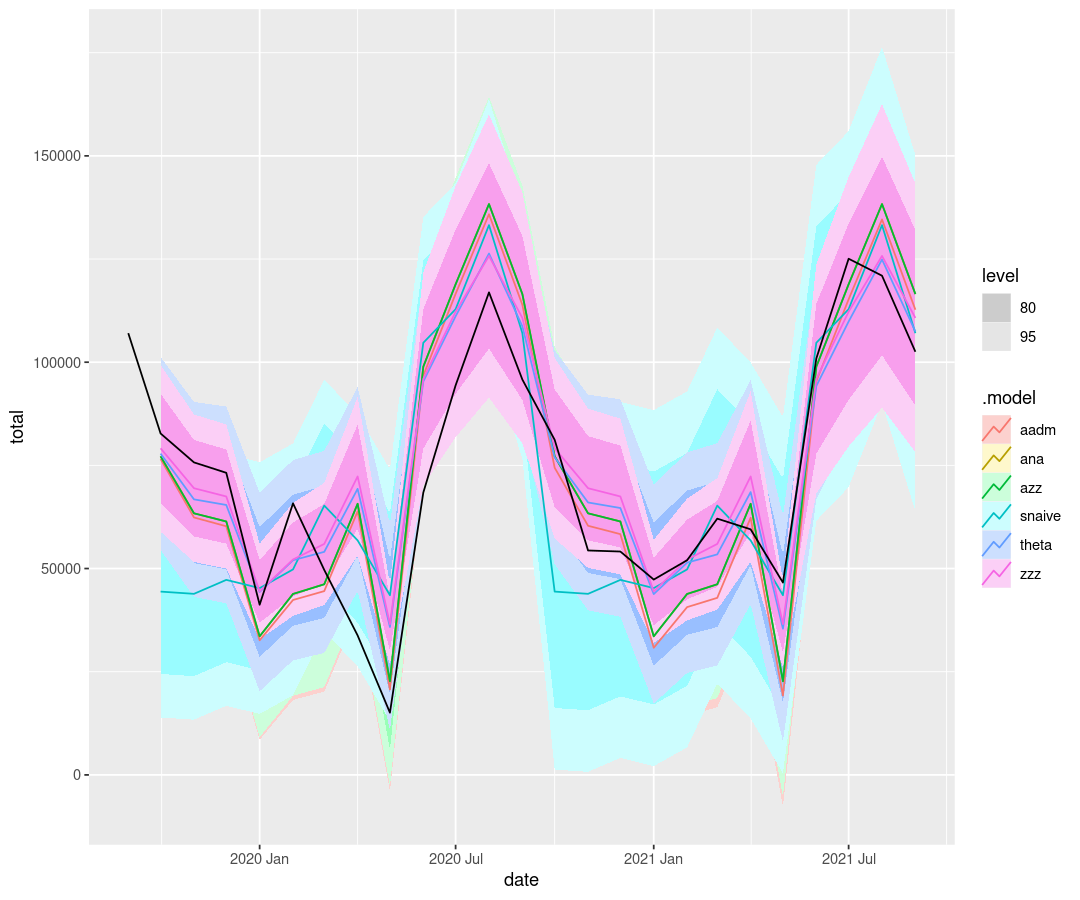

In [18]:
autoplot(fcst, filter(rf, date>ymd('2019-08-01')))